<a href="https://colab.research.google.com/github/shreyus3003/Deep_Learning/blob/master/Home_work_2_Graded/Keras_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression using Keras

The lifestyle of a person is taken as dataset for this test. The Dataset consists of labels 0 and 1 and 15 features. 

In [0]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import requests
import io

import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [149]:
url="https://raw.githubusercontent.com/shreyus3003/Deep_Learning/master/Home_work_2_Graded/disease_life_style.csv"
file=requests.get(url).content
lifestyle=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')
lifestyle.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [150]:

Y = lifestyle['TenYearCHD']
X = lifestyle.drop(['TenYearCHD'], axis=1)
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y, train_size=0.5, random_state=0)

In [0]:
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_Y_train = encoder.transform(train_y)
encoder.fit(test_y)
encoded_Y_test = encoder.transform(test_y)

In [0]:
def keras_model():
  model=tf.keras.Sequential()
  #model.add(tf.keras.layers.Flatten(input_shape=(1,28,28)))
  model.add(tf.keras.layers.Dense(15,input_dim=15, activation='relu'))
  model.add(keras.layers.Dense(30, activation="relu"))
  model.add(keras.layers.Dense(1, activation="sigmoid"))
  #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [154]:

model = keras_model()
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-10), metrics=['accuracy'], )
model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_145 (Dense)            (None, 30)                480       
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 31        
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________


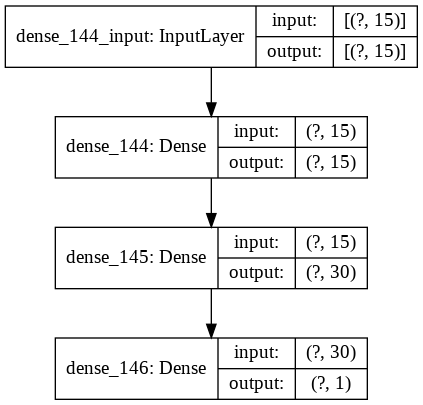

In [155]:
keras.utils.plot_model(model, "logistic.png", show_shapes=True)

In [156]:
model.fit(train_X, encoded_Y_train, verbose=0, batch_size=1)
score, accuracy = model.evaluate(test_X, encoded_Y_test, verbose=0)
print("Test Accuracy) = {:.2f}".format(accuracy))

Test Accuracy) = 0.85
